# Predict A Doctor's Consultation Fee 

The dataset contains consultation fee of different doctors along with other associated features. The dataset can be used to analyse what factors affect a doctor's consultation fee and a machine learning model can be prepared to predict a doctor's consultation fee.

## About the data

- __Size of training set: 5961 records__


- __Size of test set: 1987 records__


- Qualification: Qualification and degrees held by the doctor


- Experience: Experience of the doctor in number of years


- Rating: Rating given by patients


- Profile: Type of the doctor


- Miscellaeous_Info: Extra information about the doctor


- Fees: Fees charged by the doctor


- Place: Area and the city where the doctor is located.

In [1]:
# Importing the data
import pandas as pd 
import numpy as np

train = pd.read_csv(r'C:\Users\User\Desktop\Projects\Final_Train.csv')
test = pd.read_csv(r'C:\Users\User\Desktop\Projects\Final_Test.csv')

train.shape, test.shape

((5961, 7), (1987, 6))

#### Exploring the data

In [2]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [4]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

- The data has multiple missing values in the rows 'Rating', 'Place' and 'Miscellaneous_Info'

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


The training dataset has 5961 examples, 6 feature columns and 1 target column. 6 of the 7 features are type object data, and the target column 'Fees' is of the type int64.

In [6]:
train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


- The column Fees does not have any missing values.


- The average Fees is 300 and the minimal fees is 5, which is extremly pocket friendly.


- The maximum Fees is 950, there is a huge difference between the minimum and the maximum, this it effects the distribution of the data

In [7]:
train.describe(include=['O'])

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,5961,5961,2659,5936,5961,3341
unique,1420,64,51,877,6,2998
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...
freq,488,323,684,75,1397,40


- The column 'Qualification' has 1420 unique degrees, out of which BDS is the most frequently occuring, hence maximum number of entries in our data is of Dentists.


- The column 'Experience' has 64 unique Experience entries, even though the data is integer type the column is labeled object type.


- The column 'Rating' has 51 unique Rating entries, even though rating is integer type the column is labeled object type. The the most frequent rating entry is 100%.


- The column 'Place' has 877 unique location entries, Most of the entries are from the HSR layout, Banglore.


- The column 'Profile' has only 6 unique degrees, out of which Dentist is the most frequently occuring, hence maximum number of entries in our data is of Dentists.

In [9]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


#### Combining the train and test data

In [10]:
df = pd.concat([train.assign(ind="train"), test.assign(ind="test")])
df.shape

(7948, 8)

# Feature Engineering

The column 'Experience' has the phrase 'years experience' attached to the numerical value which needs to be dropped

In [11]:
df['Experience'] = df['Experience'].str.replace('years experience','').astype(int)

- The column 'Place', has 2 seperate entries which entices both the city and the area which need to be split for better analysis.


- Thus the column 'Place' will be split into two seperate columns 'Area' and 'City'.

In [12]:
df['Area'] = df['Place'].str.rsplit(',', 1).str.get(0)
df['City'] = df['Place'].str.rsplit(',', 1).str.get(1)

In [13]:
df.head(1)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,ind,Area,City
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,Kakkanad,Ernakulam


- The column 'Qualification', has 2 seperate entries because most of the doctor's have persued masters as well, thus it makes better sense to split them and treat them seperately.


- Thus the column 'Qualification' will be split into two seperate columns 'First_Degree' and 'Second_Degree'.

In [14]:
df['First_Degree'] = df['Qualification'].str.rsplit(',', 1).str.get(0)
df['Second_Degree'] = df['Qualification'].str.rsplit(',', 1).str.get(1)

In [15]:
df.head(1)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,ind,Area,City,First_Degree,Second_Degree
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,Kakkanad,Ernakulam,BHMS,MD - Homeopathy


In [16]:
# Since both 'Qualification' and 'Place' columns have been used to extract new features
# Thus they can be dropped
df.drop(['Qualification', 'Place'], axis=1, inplace=True)

# Data Cleaning

#### Cleaning 'Rating' 

The column has the noun percent sign (%) attached to it which needs to be dropped for better analysis|

In [17]:
df['Rating'].fillna('0%', inplace=True)
import re
def clean_text(text):
    text = re.sub(r'%', '', str(text))
    return text

df['Rating'] = df['Rating'].apply(clean_text)
df['Rating'] = df['Rating'].astype(int)

In [18]:
df.head(1)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,ind,Area,City,First_Degree,Second_Degree
0,24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,Kakkanad,Ernakulam,BHMS,MD - Homeopathy


#### Cleaning 'Miscellaneous_Info' 
The column has multiple type of data like

- The feedback provided by the customers
- Has a lot of missing values.
- The miscellaneous fees charged
- The location that has already been mentioned in another column

Which need to be seperated for better analysis

__The column seems to be very confusing__

In [20]:
df['Miscellaneous_Info'].fillna('missing', inplace=True)

# Extracting the feedback from the column and formulating a new variable 'Feedback'.
def get_text(feedback):
    feedback = re.findall(r'\d+ Feedback', str(feedback))
    if feedback == []:
        feedback = '0 Feedback'
        return feedback
    else:
        return feedback[0]

df['Feedback'] = df['Miscellaneous_Info'].apply(get_text)
df['Feedback'] = df['Feedback'].str.replace(' Feedback','')
df['Feedback'] = df['Feedback'].astype(int)

In [21]:
# Extracting the fees mentioned from the column and formulating a new variable 'Misc_Fees'.
def get_fee(text):
    text = re.sub(r',', "", text)
    text = re.findall(r'₹\d+', text)
    if text != []:
        return text[0]
    else:
        return 0

df['Misc_Fees'] = df['Miscellaneous_Info'].apply(get_fee)
df['Misc_Fees'].fillna(50, inplace=True)
df['Misc_Fees'] = df['Misc_Fees'].astype(int)

In [22]:
# Since 'Miscellaneous_Info' has been used to extract new features
# Thus it can be dropped
df.drop(['Miscellaneous_Info'], axis=1, inplace=True)

# EDA

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

#### Univariate Analysis

#### Fees

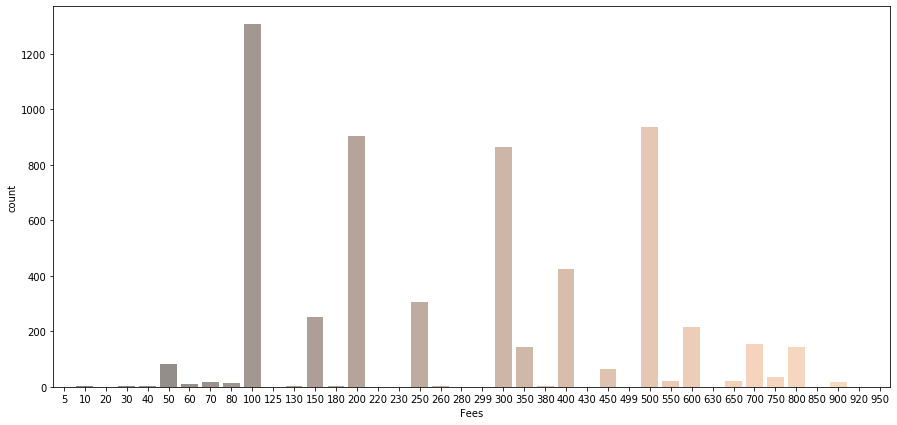

In [24]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(train['Fees'].sort_values(), ax=ax, alpha=0.5, palette='copper')
plt.show()

Most of the fees are distributed around 100,200,300 and 500.

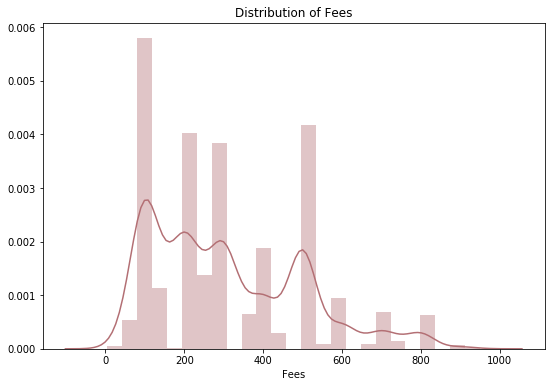

In [25]:
plt.figure(figsize = (9,6))
plt.title('Distribution of Fees')
sns.distplot(df['Fees'], color='#b36f74')

#### Profile

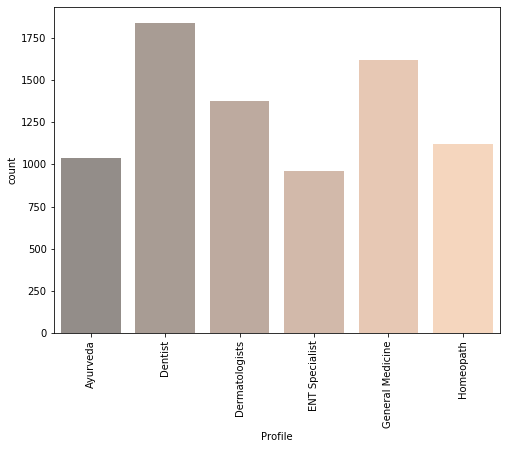

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['Profile'].sort_values(), ax=ax, alpha=0.5, palette='copper')
plt.xticks(rotation=90)
plt.show()

#### Experience

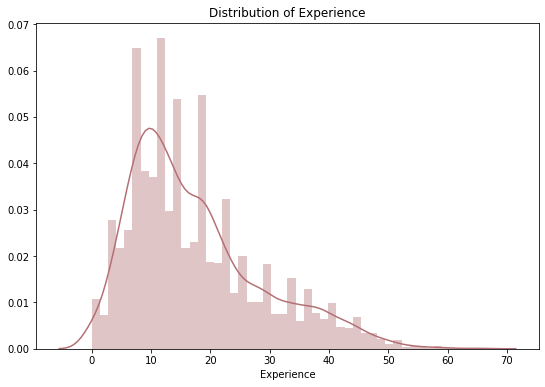

In [27]:
plt.figure(figsize = (9,6))
plt.title('Distribution of Experience')
sns.distplot(df['Experience'], color='#b36f74')

Most of the experience distribution is centered around 5-15 years

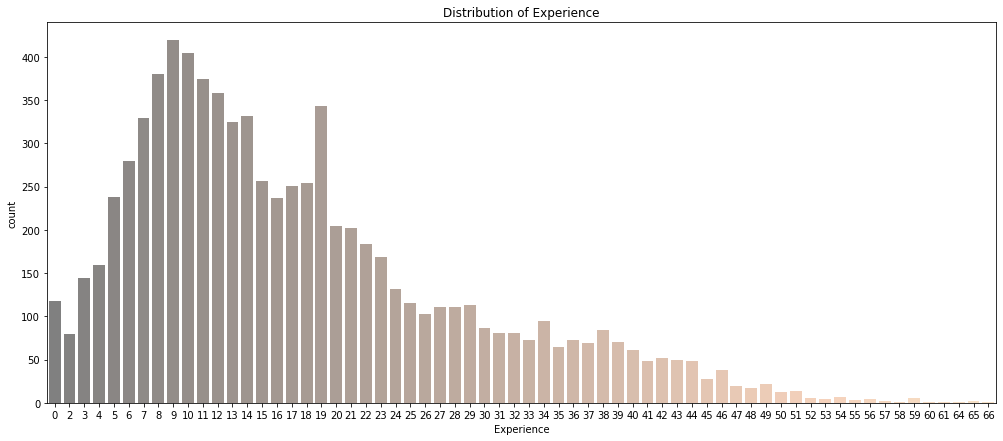

In [28]:
fig, ax = plt.subplots(figsize=(17,7))
sns.countplot(df['Experience'], ax=ax, alpha=0.5, palette='copper')
ax.set(title='Distribution of Experience')
plt.show()

#### Bi-variate Analysis

#### Fees

Text(0.5, 1.0, 'Experience According to Fees')

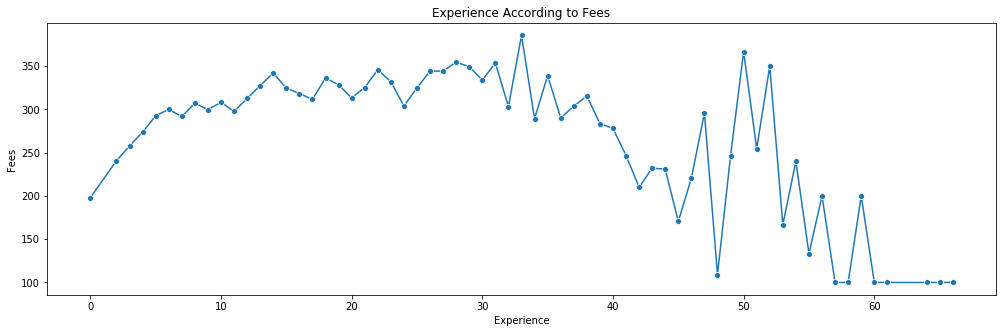

In [29]:
plt.figure(figsize=(17,5))
sns.lineplot(x="Experience", y="Fees", marker='o', ci=None, data=df)
plt.title("Experience According to Fees")

- It can be assumed that there is a association between the experience of the doctor and the fees they charged. 


- Average fees increased with experience but peak at approximately 25 years of experience, then, average fees decreased with further increasing number of experience.

Text(0.5, 1.0, 'Rating According to Fees')

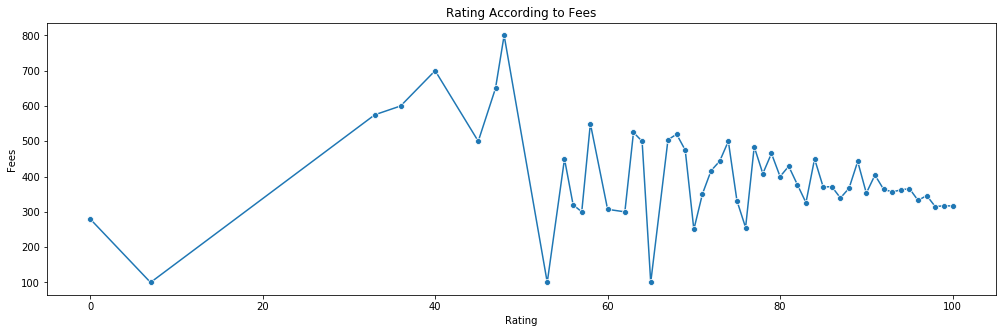

In [30]:
plt.figure(figsize=(17,5))
sns.lineplot(x="Rating", y="Fees", marker='o', ci=None, data=df)
plt.title("Rating According to Fees")

- high rating does not correlate to a higher fee charged and a lower fee might be the reason for high rating), and the highest average fees charged were actually rated 30–60%. 

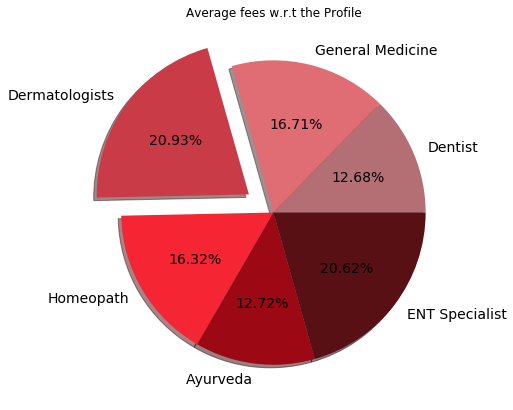

In [31]:
profile=train['Profile'].value_counts().index

colors= ['#b36f74','#e06c74','#c93c47','#f52534','#9c0813','#591015']

arr=[]
for i in profile:
  x=train[train['Profile']==i]
  arr.append(np.mean(x['Fees']))
plt.figure(figsize=(7,7))    
plt.title('Average fees w.r.t the Profile')
plt.pie(arr,labels=profile, colors=colors, autopct='%1.2f%%', pctdistance=0.6,
        labeldistance=1.1,shadow=True,textprops={'fontsize':14}, explode=(0,0,0.2,0,0,0))
plt.show()

- It states that 'Ayurveda' doctors earn the least compared to the rest of the profiles.


- whereas the 'Dermatologists' and the 'ENT' specialists are earning the most.

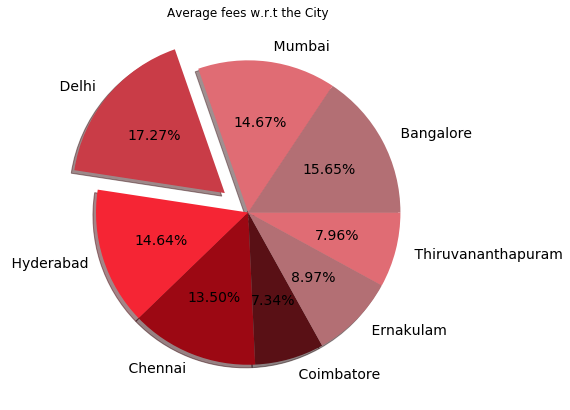

In [32]:
City=df['City'].value_counts().index
colors= ['#b36f74','#e06c74','#c93c47','#f52534','#9c0813','#591015']

arr=[]
for i in City:
  x=df[df['City']==i]
  arr.append(np.mean(x['Fees']))
    
plt.figure(figsize=(7,7))    
plt.title('Average fees w.r.t the City')
plt.pie(arr,labels=City, colors=colors, autopct='%1.2f%%', pctdistance=0.6,
        labeldistance=1.1,shadow=True,textprops={'fontsize':14}, explode=(0,0,0.2,0,0,0,0,0))
plt.show()

- It shows that the cities are highly correlated with the wages of the doctor.


- It can be said that the Fees is fairly high in metropolitian cities like Delhi, Banglore, Mumbai and Hyderabad.

#### City

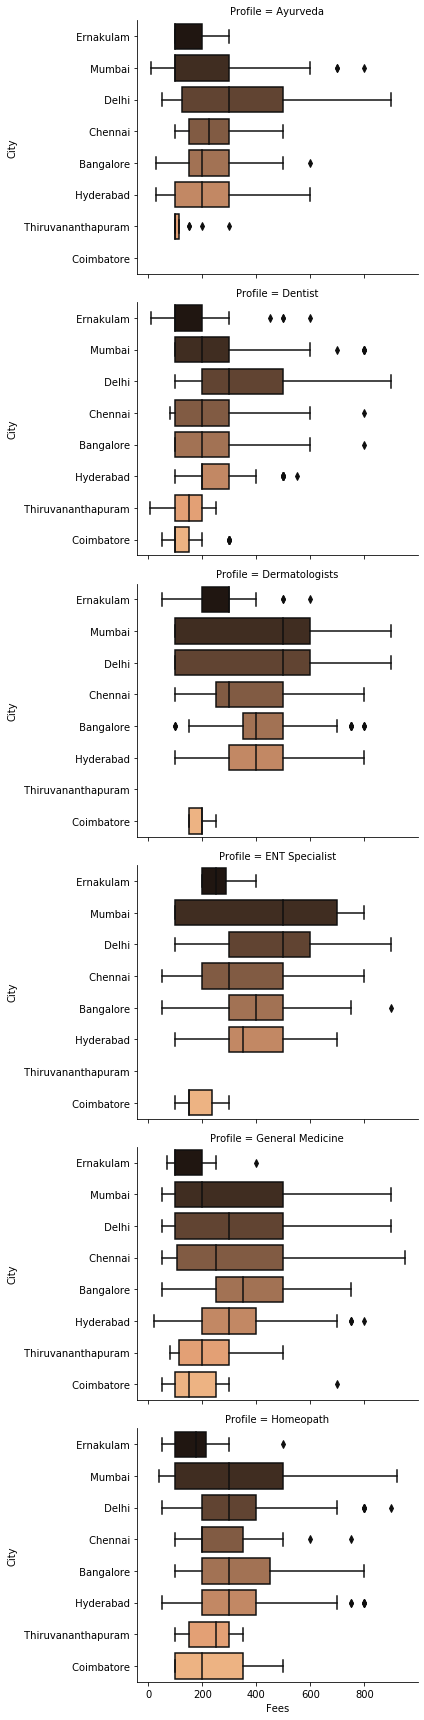

In [33]:
sns.catplot(x='Fees', y='City', row='Profile', data=df.sort_values("Profile"), kind='box', height=4, aspect= 1.5, palette='copper')
plt.show()

1. __Ayurveda__ : There are no Ayurvedic doctor's in Coimbatore and most in Delhi


2. __Dentist__ : Delhi has the maximum number of Dentists and Coimbatore has the least.


3. __Dermatologists__ : There are no Dermatologists in Thiruvananthpuram and equal amount in Delhi and Mumbai.


4. __ENT__ : There are no Dermatologists in Thiruvananthpuram and maximum Delhi.


5. __Genral Medicine__ : Theres very few in Ernakulum


6. __Homeopath__ : Mumbai has the maximum number of Homepath doctor's.


__A genral conclusion can be drawn that Metropolitian Cities like Mumbai and Delhi both have very high number of all profiles of doctor's. Smaller cities like Coimbatore and Thiruvananthpuram do not necesirraly have all profiles of doctor's__ 

#### Encoding the column Profile

In [34]:
df = pd.get_dummies(df, columns=['Profile'])

#### Treating the missing values

In [35]:
df.isnull().sum()

Experience                     0
Rating                         0
Fees                        1987
ind                            0
Area                          31
City                          32
First_Degree                   0
Second_Degree               2571
Feedback                       0
Misc_Fees                      0
Profile_Ayurveda               0
Profile_Dentist                0
Profile_Dermatologists         0
Profile_ENT Specialist         0
Profile_General Medicine       0
Profile_Homeopath              0
dtype: int64

In [36]:
# Filling the null values in categorical columns

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')

df['Area']=imp.fit_transform(df['Area'].values.reshape(-1,1))
df['City']=imp.fit_transform(df['City'].values.reshape(-1,1))

In [37]:
# Not all doctor's have undertaken a second degree thus the should be imputed
df['Second_Degree'] = df['Second_Degree'].replace(np.nan, 'No Second Degree') 

#### Splitting the data into train and test back

In [38]:
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]
test = test.drop(['ind','Fees'], axis=1)
train = train.drop(['ind'], axis=1)

In [39]:
targets = train['Fees']
train.drop('Fees',axis=1,inplace=True)
train.shape, targets.shape

((5961, 14), (5961,))

# Training Phase

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(train,targets,test_size=.25,random_state=1)

In [41]:
x_train_qual1 = x_train['First_Degree']
x_test_qual1 = x_test['First_Degree']

x_train_qual2 = x_train['Second_Degree']
x_test_qual2 = x_test['Second_Degree']

x_train_area = x_train['Area']
x_test_area = x_test['Area']

x_train_city = x_train['City']
x_test_city = x_test['City']

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = TfidfVectorizer(ngram_range=(1,2), binary=True, token_pattern=r'\w{3,}')
x_train_qual1 = tf1.fit_transform(x_train_qual1)
x_test_qual1 = tf1.transform(x_test_qual1)

x_train_qual2 = tf1.fit_transform(x_train_qual2)
x_test_qual2 = tf1.transform(x_test_qual2)

tf2 = TfidfVectorizer()
x_train_area = tf2.fit_transform(x_train_area)
x_test_area = tf2.transform(x_test_area)

x_train_city = tf2.fit_transform(x_train_city)
x_test_city = tf2.transform(x_test_city)

In [43]:
x_train_exp = np.array(x_train['Experience']).reshape(-1,1)
x_test_exp = np.array(x_test['Experience']).reshape(-1,1)

x_train_feedback = np.array(x_train['Feedback']).reshape(-1,1)
x_test_feedback = np.array(x_test['Feedback']).reshape(-1,1)

x_train_rating = np.array(x_train['Rating']).reshape(-1,1)
x_test_rating = np.array(x_test['Rating']).reshape(-1,1)

In [44]:
cols = ['Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath']

x_train_prof = x_train[cols]
x_test_prof = x_test[cols]

x_train_miscfees = np.array(x_train['Misc_Fees']).reshape(-1,1)
x_test_miscfees = np.array(x_test['Misc_Fees']).reshape(-1,1)

In [45]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_squared_error,r2_score,mean_absolute_error

In [46]:
from scipy.sparse import hstack
merged_train = hstack((x_train_exp, x_train_qual1, x_train_qual2, x_train_prof, x_train_rating, x_train_miscfees, x_train_area,x_train_city))
merged_test  = hstack((x_test_exp, x_test_qual1, x_test_qual2, x_test_prof, x_test_rating, x_test_miscfees, x_test_area,x_test_city))

In [47]:
merged_train.shape, merged_test.shape

((4470, 3445), (1491, 3445))

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()
lg.fit(merged_train,y_train)
lg.score(merged_train,y_train)
pred_lin = lg.predict(merged_test)

lgs = r2_score(y_test,pred_lin)
print('R2 Score:',lgs*100)

R2 Score: -38.4558940650225


In [50]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lin))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lin))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_lin)))

Error:
Mean Absolute Error: 156.05271276417213
Mean Squared Error: 49808.8725574419
Root Mean Square Error: 223.17901459913722


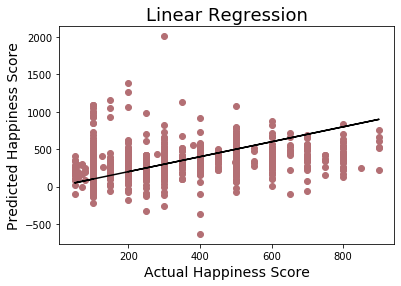

In [51]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_lin, color='#b36f74')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

### Lasso Regression

In [52]:
from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(merged_train,y_train)
ls.score(merged_train,y_train)
pred_ls = ls.predict(merged_test)

lss = r2_score(y_test,pred_ls)
print('R2 Score:',lss*100)

R2 Score: 18.851229636829302


In [53]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 135.39641994426944
Mean Squared Error: 29192.89777085324
Root Mean Square Error: 170.85929231637724


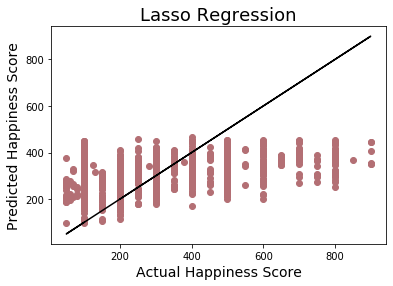

In [54]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_ls, color='#b36f74')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

### Ridge Regression

In [55]:
from sklearn.linear_model import Ridge

rg = Ridge()
rg.fit(merged_train,y_train)
rg.score(merged_train,y_train)
pred_rg = rg.predict(merged_test)

rgs = r2_score(y_test, pred_rg)
print('R2 Score:',rgs*100)

R2 Score: 21.47150125732491


In [56]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rg))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rg))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rg)))

Error:
Mean Absolute Error: 128.52535448341305
Mean Squared Error: 28250.267079018227
Root Mean Square Error: 168.07815764999992


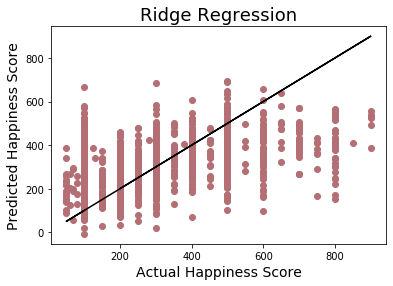

In [57]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_rg, color='#b36f74')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

### KNN

In [58]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()
kn.fit(merged_train,y_train)
kn.score(merged_train,y_train)
pred_kn = kn.predict(merged_test)

kns = r2_score(y_test,pred_kn)
print('R2 Score:',kns*100)

R2 Score: 5.418581179045933


In [59]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_kn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_kn))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_kn)))

Error:
Mean Absolute Error: 143.88477531857814
Mean Squared Error: 34025.231415157614
Root Mean Square Error: 184.4592947377757


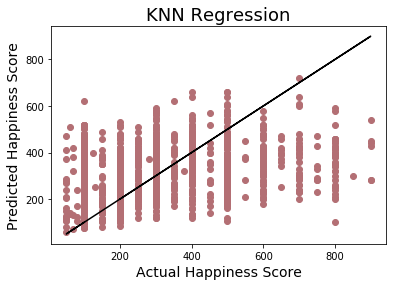

In [60]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_kn, color='#b36f74')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('KNN Regression',fontsize=18)
plt.show()

### DecisionTree

In [61]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(merged_train,y_train)
dtr.score(merged_train,y_train)
pred_dtr = dtr.predict(merged_test)

dtrs = r2_score(y_test,pred_dtr)
print('R2 Score:',dtrs*100)

R2 Score: -28.49434830203763


In [62]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

Error:
Mean Absolute Error: 149.77129443326626
Mean Squared Error: 46225.25217974514
Root Mean Square Error: 215.00058646372372


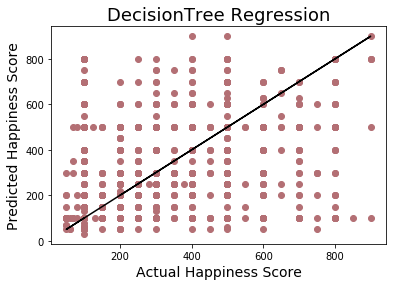

In [63]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_dtr, color='#b36f74')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('DecisionTree Regression',fontsize=18)
plt.show()

### RandomForest

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(merged_train,y_train)
rf.score(merged_train,y_train)
pred_random = rf.predict(merged_test)

rfs = r2_score(y_test,pred_random)
print('R2 Score:',rfs*100)

R2 Score: 20.640431851134768


In [65]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_random))
print('Mean Squared Error:',mean_squared_error(y_test,pred_random))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_random)))

Error:
Mean Absolute Error: 127.03445546293636
Mean Squared Error: 28549.240484367612
Root Mean Square Error: 168.96520495169298


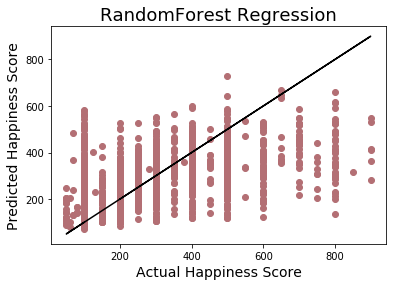

In [66]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_random, color='#b36f74')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('RandomForest Regression',fontsize=18)
plt.show()

### GradientBoost

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(merged_train,y_train)
gbr.score(merged_train,y_train)
pred_gb = gbr.predict(merged_test)

gbs = r2_score(y_test,pred_gb)
print('R2 Score:',gbs*100)

R2 Score: 22.717576613954225


In [68]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gb))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_gb)))

Error:
Mean Absolute Error: 131.57096174911425
Mean Squared Error: 27801.997187335815
Root Mean Square Error: 166.73930906458685


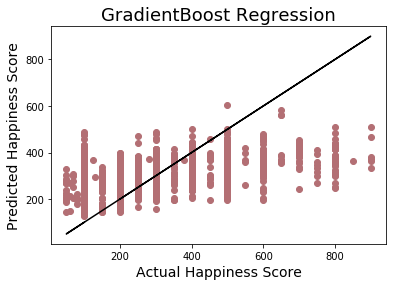

In [69]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_gb, color='#b36f74')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('GradientBoost Regression',fontsize=18)
plt.show()

### AdaBoost

In [70]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(merged_train,y_train)
ada.score(merged_train,y_train)
pred_ada = ada.predict(merged_test)

adas = r2_score(y_test,pred_ada)
print('R2 Score:',adas*100)

R2 Score: 9.99060475234369


In [71]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ada))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ada))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_ada)))

Error:
Mean Absolute Error: 149.08798535146437
Mean Squared Error: 32380.466914304645
Root Mean Square Error: 179.94573324840087


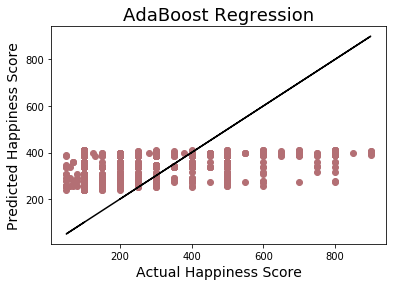

In [72]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_ada, color='#b36f74')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('AdaBoost Regression',fontsize=18)
plt.show()

### XGB

In [73]:
import xgboost as xgb

xg = xgb.XGBRegressor()
xg.fit(merged_train,y_train)
xg.score(merged_train,y_train)
pred_xg = xg.predict(merged_test)

xgs = r2_score(y_test,pred_xg)
print('R2 Score:',xgs*100)

R2 Score: 25.065161882449626


In [74]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_xg))
print('Mean Squared Error:',mean_squared_error(y_test,pred_xg))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_xg)))

Error:
Mean Absolute Error: 125.94814678680808
Mean Squared Error: 26957.464159357234
Root Mean Square Error: 164.1872837931039


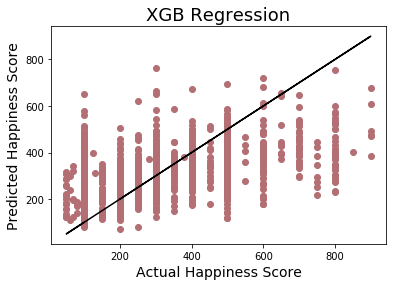

In [75]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_xg, color='#b36f74')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('XGB Regression',fontsize=18)
plt.show()

### Bagging

In [76]:
from sklearn.ensemble import BaggingRegressor

bg = BaggingRegressor()
bg.fit(merged_train,y_train)
bg.score(merged_train,y_train)
pred_bg = bg.predict(merged_test)

bgs = r2_score(y_test,pred_bg)
print('R2 Score:',bgs*100)

R2 Score: 13.804722064293085


In [77]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_bg))
print('Mean Squared Error:',mean_squared_error(y_test,pred_bg))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_bg)))

Error:
Mean Absolute Error: 130.59195171026155
Mean Squared Error: 31008.355713167897
Root Mean Square Error: 176.0918956487433


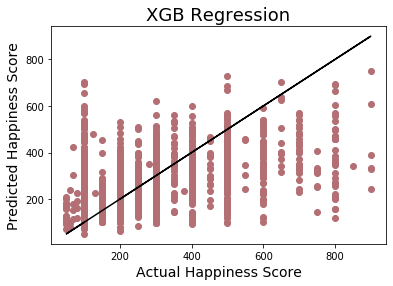

In [78]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_bg, color='#b36f74')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('XGB Regression',fontsize=18)
plt.show()

### Picking the best model

In [79]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Lasso Regression', 'Ridge Regression','KNN','Decision Tree Regression',
              'Random Forest Regression','Gradient Boost Regression','AdaBoost Regressor','XGBoost','BaggingRegressor'],
    'R2 Score': [lgs*100, lss*100, rgs*100, kns*100, dtrs*100, rfs*100, gbs*100, adas*100, xgs*100, bgs*100]})
models.sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
8,XGBoost,25.065162
6,Gradient Boost Regression,22.717577
2,Ridge Regression,21.471501
5,Random Forest Regression,20.640432
1,Lasso Regression,18.851230
9,BaggingRegressor,13.804722
7,AdaBoost Regressor,9.990605
3,KNN,5.418581
4,Decision Tree Regression,-28.494348
0,Linear Regression,-38.455894


The scores aren't very great, and the top scores are from the models are 
1. XGBoost
2. Gradient Boost Regressor
3. Ridge Regressior
4. Random Forest Regressior
5. Lasso Regression

__And Hyperparameter Tuning needs to be performed on top 5 models to attain better scores__

## Hyperparameter Tuning

#### XGB

In [80]:
from xgboost import XGBRegressor
grid_param = {'learning_rate': [0.02,0],
              'gamma': [100,200,300],
              'max_depth': [0,25],
              'min_child_weight': [0,1],
              'max_delta_step': [0.1,0],
              'subsample': [0,0.75,0.85,0.95,1],
              'colsample_bylevel': [0,0.50,0.95,1],
              'colsample_bytree': [0.3,0.7],
              'reg_lambda': [0,1]}

from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor()
reg_xgb = RandomizedSearchCV(estimator = xgb,
                               param_distributions = grid_param,
                               cv=5, verbose=2, n_jobs = -1)

reg_xgb.fit(merged_train,y_train)
print(reg_xgb.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   34.8s finished


{'subsample': 0.85, 'reg_lambda': 1, 'min_child_weight': 0, 'max_depth': 25, 'max_delta_step': 0, 'learning_rate': 0.02, 'gamma': 100, 'colsample_bytree': 0.7, 'colsample_bylevel': 1}


In [81]:
xgb = XGBRegressor(learning_rate=0.02, 
                   gamma=100, 
                   max_depth=25,  
                   min_child_weight=0, 
                   max_delta_step=0, 
                   subsample=0.75,  
                   colsample_bylevel=0.95,  
                   colsample_bytree=0.70,  
                   reg_lambda=1)
xgb.fit(merged_train, y_train)
y_pred1 = xgb.predict(merged_test)
y_pred1 = y_pred1.astype(int)
lssx = r2_score(y_test,y_pred1)
print('R2 Score:',lssx)
lssrr = sqrt(mean_squared_log_error(y_test, y_pred1))
print('RMSLE:', lssrr)
print('RMSE:', sqrt(mean_squared_error(y_test, y_pred1)))

R2 Score: 0.22401112419752456
RMSLE: 0.5737818956650961
RMSE: 167.08035111598525


#### GradientBoost

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
grid_param = {'loss':['ls','lad','huber','quantile'],
              'learning_rate':[0.1,0.2],  
              'random_state':[10,20], 
              'n_estimators':[92,100],   
              'max_depth':[10,11],  
              'subsample':[0,1.0], 
              'min_samples_split':[40,80], 
              'min_samples_leaf':[0,1],
              'max_features':['auto','sqrt','log2']}

from sklearn.model_selection import RandomizedSearchCV
gbr1= GradientBoostingRegressor()
reg_gbr1 = RandomizedSearchCV(estimator = gbr1,
                               param_distributions = grid_param,
                               cv=5, verbose=2, n_jobs = -1)

reg_gbr1.fit(merged_train,y_train)
print(reg_gbr1.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.7s finished


{'subsample': 1.0, 'random_state': 10, 'n_estimators': 92, 'min_samples_split': 80, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 11, 'loss': 'lad', 'learning_rate': 0.2}


In [83]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(loss='lad', 
                               learning_rate=0.2,  
                               random_state=10, 
                               n_estimators=92,   
                               max_depth=11,  
                               subsample=1.0, 
                               min_samples_split=40, 
                               min_samples_leaf=1,
                               max_features='auto')
gb.fit(merged_train, y_train)
y_pred3 = gb.predict(merged_test)
lssgb = r2_score(y_test,y_pred3)
print('R2 Score:',lssgb)
lsgbr = sqrt(mean_squared_log_error(y_test, y_pred3))
print('RMSLE:', lsgbr)
print('RMSE:', sqrt(mean_squared_error(y_test, y_pred3)))

R2 Score: 0.23923147600618655
RMSLE: 0.5916420201569095
RMSE: 165.4336681479496


#### Ridge 

In [84]:
grid_param = {'alpha': [0.0001,0.001,0.01,0,1.0,10],
             'fit_intercept': ['True','False'],
             'normalize': ['True','False'],
             'copy_X': ['True','False'],
             'max_iter': [100,300,500,800,1000],
             'solver': ['auto', 'svd', 'holesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
             'random_state': [0,10,20,30,40,50,60,70,80,90]}

from sklearn.model_selection import RandomizedSearchCV
rg = Ridge()
reg_ridge = RandomizedSearchCV(estimator = rg,
                               param_distributions = grid_param,
                               cv=5, verbose=2, n_jobs = -1)

reg_ridge.fit(merged_train,y_train)
print(reg_ridge.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'solver': 'sparse_cg', 'random_state': 20, 'normalize': 'False', 'max_iter': 500, 'fit_intercept': 'True', 'copy_X': 'True', 'alpha': 1.0}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


In [85]:
lsr = Ridge(solver='auto',
            random_state=70,
            normalize=False,
            max_iter=500,
            fit_intercept=False,
            copy_X=True,
            alpha=0.01)

lsr.fit(merged_train, y_train)
y_pred6 = lsr.predict(merged_test)
lssr = r2_score(y_test,y_pred6)
print('R2 Score:',lss)
lsrr = sqrt(mean_squared_log_error(y_test, y_pred6))
print('RMSLE:', lsrr)
print('RMSE:', sqrt(mean_squared_error(y_test, y_pred6)))

R2 Score: 0.18851229636829303
RMSLE: 0.6736966020039119
RMSE: 171.41456669899796


#### RandomForest

In [86]:
grid_param = {'criterion':['mse'], 
              'max_depth':[20,58],  
              'min_samples_split':[5,10], 
              'min_samples_leaf':[0,2], 
              'min_weight_fraction_leaf':[0.0,0.2], 
              'max_features':['auto','sqrt','log2'],  
              'min_impurity_decrease':[0.20,0.0],  
              'bootstrap':['True','False'], 
              'oob_score':['True','False'], 
              'n_jobs':[-1,0]}

from sklearn.model_selection import RandomizedSearchCV
rfr = RandomForestRegressor()
reg_rfr = RandomizedSearchCV(estimator = rfr,
                               param_distributions = grid_param,
                               cv=5, verbose=2, n_jobs = -1)

reg_rfr.fit(merged_train,y_train)
print(reg_rfr.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


{'oob_score': 'True', 'n_jobs': -1, 'min_weight_fraction_leaf': 0.2, 'min_samples_split': 5, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.2, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'mse', 'bootstrap': 'True'}


In [87]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=29,  
                           criterion='mse', 
                           max_depth=58,  
                           min_samples_split=5, 
                           min_samples_leaf=2, 
                           min_weight_fraction_leaf=0.0, 
                           max_features='auto', 
                           max_leaf_nodes=None, 
                           min_impurity_decrease=0.20,  
                           bootstrap=True, 
                           oob_score=True, 
                           n_jobs=-1, 
                           random_state=11)  

rf.fit(merged_train, y_train)
y_pred4 = rf.predict(merged_test)
rff = r2_score(y_test,y_pred4)
print('R2 Score:',lss)
rffr = sqrt(mean_squared_log_error(y_test, y_pred4))
print('RMSLE:', rffr)
print('RMSE:', sqrt(mean_squared_error(y_test, y_pred4)))

R2 Score: 0.18851229636829303
RMSLE: 0.6051871102348879
RMSE: 168.34853998414553


#### Lasso

In [88]:
grid_param = {'alpha': [0.0001,0.001,0.01,0,1.0,10],
             'fit_intercept': ['True','False'],
             'normalize': ['True','False'],
             'copy_X': ['True','False'],
             'max_iter': [100,300,500,800,1000],
             'random_state': [0,10,20,30,40,50,60,70,80,90],
             'warm_start': ['True','False'],
             'positive': ['True','False'],
             'selection': ['cyclic','random']}

from sklearn.model_selection import RandomizedSearchCV
las = Lasso()
reg_lasso = RandomizedSearchCV(estimator = las,
                               param_distributions = grid_param,
                               cv=5, verbose=2, n_jobs = -1)

reg_lasso.fit(merged_train,y_train)
print(reg_lasso.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


{'warm_start': 'False', 'selection': 'cyclic', 'random_state': 70, 'positive': 'True', 'normalize': 'False', 'max_iter': 300, 'fit_intercept': 'False', 'copy_X': 'False', 'alpha': 0.01}


In [89]:
lss = Lasso(warm_start=False,
            selection='cyclic',
            random_state=40,
            positive=True,
            normalize=False,
            max_iter=1000,
            fit_intercept=True,
            copy_X=True,
            alpha=0.01)

lss.fit(merged_train, y_train)
y_pred7 = lss.predict(merged_test)
lsss = r2_score(y_test,y_pred7)
print('R2 Score:',lsss)
lsssr = sqrt(mean_squared_log_error(y_test, y_pred7))
print('RMSLE:', lsssr)
print('RMSE:', sqrt(mean_squared_error(y_test, y_pred7)))

R2 Score: 0.15671906110129874
RMSLE: 0.6325094300149217
RMSE: 174.17417954629224


## Picking the best model

## Evaluation Metrics

__Root Mean Squared Logarithmic Error (RMSLE)__ 

- It is the Root Mean Squared Error of the log-transformed predicted and log-transformed actual values.


- RMSLE is preferable when:

i. targets having exponential growth, such as population counts, average sales of a commodity over a span of years etc.


ii. there is a wide range in the target variables and


iii. we want to penalize under estimates more than over estimates.


__Thus RMSLE is a better choice for evaluation metrics rather than R2 score for this data__

In [90]:
models = pd.DataFrame({
    'Model': ['XGBoostRegressor', 'GradientBoostingRegressor', 'Ridge', 'RandomForestRegressor','Lasso'],
    'R2 Score': [lssx*100, lssgb*100, lssr*100, rff*100,lsss*100],
    'RMSLE': [lssrr*100, lsgbr*100, lsrr*100, rffr*100,lsssr*100] 
})
models.sort_values(by='RMSLE', ascending=False)

,Model,R2 Score,RMSLE
2,Ridge,18.322923,67.369660
4,Lasso,15.671906,63.250943
3,RandomForestRegressor,21.218645,60.518711
1,GradientBoostingRegressor,23.923148,59.164202
0,XGBoostRegressor,22.401112,57.378190


__After Hyperparameter Tuning__

- The best model for the data is RandomForestRegressor because it has a fairly high value for R2 score as well as RMSLE.

#### Saving the best model

In [91]:
import pickle

filename = 'Doctor_Fee_Prediction.pkl'
pickle.dump(rf, open(filename, 'wb'))

## Testing Phase

In [92]:
test = pd.read_csv(r'C:\Users\User\Desktop\Projects\Final_Test.csv')
test.shape

(1987, 6)

In [93]:
test.head(1)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN


In [94]:
test['Experience'] = test['Experience'].str.replace('years experience','').astype(int)

In [95]:
test['Qualification'] = test['Qualification'].apply(clean_text)
test['Place'].fillna('missing', inplace=True)

In [96]:
test['Area'] = test['Place'].str.rsplit(',', 1).str.get(0)
test['City'] = test['Place'].str.rsplit(',', 1).str.get(1)

In [97]:
test['First_Degree'] = test['Qualification'].str.rsplit(',', 1).str.get(0)
test['Second_Degree'] = test['Qualification'].str.rsplit(',', 1).str.get(1)

In [98]:
test.drop(['Qualification', 'Place'], axis=1, inplace=True)

In [99]:
test['Rating'].fillna('0%', inplace=True)
test['Rating'] = test['Rating'].apply(clean_text)
test['Rating'] = test['Rating'].astype(int)

In [102]:
test['Miscellaneous_Info'].fillna('missing', inplace=True)
test['Feedback'] = test['Miscellaneous_Info'].apply(get_text)
test['Feedback'] = test['Feedback'].str.replace(' Feedback','')
test['Feedback'] = test['Feedback'].astype(int)

In [103]:
test['Misc_Fees'] = test['Miscellaneous_Info'].apply(get_fee)
test['Misc_Fees'].fillna(50, inplace=True)
test['Misc_Fees'] = test['Misc_Fees'].astype(int)

In [104]:
test.drop(['Miscellaneous_Info'], axis=1, inplace=True)

In [105]:
test = pd.get_dummies(test, columns=['Profile'])

In [106]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')

test['Area']=imp.fit_transform(test['Area'].values.reshape(-1,1))
test['City']=imp.fit_transform(test['City'].values.reshape(-1,1))

In [107]:
test['Second_Degree'] = test['Second_Degree'].replace(np.nan, 'No Second Degree') 

In [108]:
test.head(1)

,Experience,Rating,Area,City,First_Degree,Second_Degree,Misc_Fees,Feedback,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,35,0,Ghatkopar East,Mumbai,MBBS,No Second Degree,0,0,0,0,0,0,1,0


In [109]:
x_train = df.drop(labels='Fees', axis=1)
y_train = df['Fees'].values
x_test = test

In [110]:
x_train_qual1 = x_train['First_Degree']
x_test_qual1 = x_test['First_Degree']

x_train_qual2 = x_train['Second_Degree']
x_test_qual2 = x_test['Second_Degree']

x_train_area = x_train['Area']
x_test_area = x_test['Area']

x_train_city = x_train['City']
x_test_city = x_test['City']

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = TfidfVectorizer(ngram_range=(1,2), binary=True, token_pattern=r'\w{3,}')
x_train_qual1 = tf1.fit_transform(x_train_qual1)
x_test_qual1 = tf1.transform(x_test_qual1)

x_train_qual2 = tf1.fit_transform(x_train_qual2)
x_test_qual2 = tf1.transform(x_test_qual2)

tf2 = TfidfVectorizer()
x_train_area = tf2.fit_transform(x_train_area)
x_test_area = tf2.transform(x_test_area)

x_train_city = tf2.fit_transform(x_train_city)
x_test_city = tf2.transform(x_test_city)

In [112]:
x_train_exp = np.array(x_train['Experience']).reshape(-1,1)
x_test_exp = np.array(x_test['Experience']).reshape(-1,1)

x_train_feedback = np.array(x_train['Feedback']).reshape(-1,1)
x_test_feedback = np.array(x_test['Feedback']).reshape(-1,1)

x_train_rating = np.array(x_train['Rating']).reshape(-1,1)
x_test_rating = np.array(x_test['Rating']).reshape(-1,1)

In [113]:
cols = ['Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath']

x_train_prof = x_train[cols]
x_test_prof = x_test[cols]

x_train_miscfees = np.array(x_train['Misc_Fees']).reshape(-1,1)
x_test_miscfees = np.array(x_test['Misc_Fees']).reshape(-1,1)

In [115]:
from scipy.sparse import hstack
merged_train = hstack((x_train_exp, x_train_qual1, x_train_qual2, x_train_prof, x_train_rating, x_train_miscfees, x_train_area,x_train_city))
merged_test  = hstack((x_test_exp, x_test_qual1, x_test_qual2, x_test_prof, x_test_rating, x_test_miscfees, x_test_area,x_test_city))

In [116]:
merged_train.shape, merged_test.shape

((7948, 4492), (1987, 4492))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()  

rf.fit(merged_train, y_train)
rf.score(merged_train,y_train)

y_pred = rf.predict(merged_test)
y_pred

In [ ]:
np.savetxt("Doctor_Cosultation_Fee_Prediction.csv", y_pred, delimiter=",")

# Conclusion

- Average fees increased with experience but peak at approximately 25 years of experience, then, average fees decreased with further increasing number of experience.


- high rating does not correlate to a higher fee charged and a lower fee might be the reason for high rating), and the highest average fees charged were actually rated 30–60%. 


- 'Ayurveda' doctors earn the least compared to the rest of the profiles.


- 'Dermatologists' and the 'ENT' specialists earn the most.


- Cities are highly correlated with the wages of the doctor.


- It can be said that the Fees is fairly high in metropolitian cities like Delhi, Banglore, Mumbai and Hyderabad.


- A genral conclusion can be drawn that Metropolitian Cities like Mumbai and Delhi both have very high number of all profiles of doctor's. Smaller cities like Coimbatore and Thiruvananthpuram do not necesirraly have all profiles of doctor's